In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

loc = r"C:\Users\me\Documents\datasets\black_train.csv"
loc2 = r"C:\Users\me\Documents\datasets\black_test.csv"

train = pd.read_csv(loc)
test = pd.read_csv(loc2)

In [2]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
test.head()

,Unnamed: 0,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Comb
0,0,1000004,P00128942,M,46-50,7,B,2,0,1,11.0,NaN,1000004P00128942
1,1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,1000009P00113442
2,2,1000010,P00288442,F,36-45,1,B,4+,0,5,14.0,NaN,1000010P00288442
3,3,1000010,P00145342,F,36-45,1,B,4+,0,4,9.0,NaN,1000010P00145342
4,4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,1000011P00053842


In [4]:
#Drop the redundant 'Unnamed: 0' from the test set.
#The comb column is a combination of the User_ID and Product_ID columns.
#We can remove this column too.
test = test.drop(['Unnamed: 0','Comb'], axis=1)

In [5]:
#Combine the train and test sets to give the full data set.
data = pd.concat([train, test], ignore_index=True)

In [6]:
print (train.shape, test.shape, data.shape)

(550068, 12) (233599, 11) (783667, 12)


In [7]:
#We have a large data set with a total of 783,667 rows and 12 columns.
#Let's check which columns contain missing values.

data.apply(lambda x: sum(x.isnull()))

Age                                0
City_Category                      0
Gender                             0
Marital_Status                     0
Occupation                         0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Product_ID                         0
Purchase                      233599
Stay_In_Current_City_Years         0
User_ID                            0
dtype: int64

In [8]:
#We have nulls in three columns: Product_Category_1, Product_Category_2 and
#Purchase. The nulls in the purchase column are easy to explain as they are the target we are 
#trying to predict. The other nulls are not necessarily a problem because a product may have 
#several categories (1 to 3. Therefore nulls in these columns are to be expected.

In [9]:
data.describe()

C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_ID
count,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000,7.836670e+05
mean,0.287542,8.079300,5.366196,9.844506,12.668605,9263.968713,1.003029e+06
std,0.452617,6.522206,3.878160,5.089093,4.125510,5023.065394,1.727267e+03
min,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000,1.000001e+06
25%,0.000000,2.000000,1.000000,NaN,NaN,NaN,1.001519e+06
50%,0.000000,7.000000,5.000000,NaN,NaN,NaN,1.003075e+06
75%,1.000000,14.000000,8.000000,NaN,NaN,NaN,1.004478e+06
max,1.000000,20.000000,20.000000,18.000000,18.000000,23961.000000,1.006040e+06


In [10]:
#29% of the purchases are made by married people on average. The mean
#purchase amount is 9,200 with a sd of 5000. There is a stark range in purchase amount.

In [11]:
#Let's check how many unique values our dataset contains.

data.apply(lambda x: len(x.unique()))

Age                               7
City_Category                     3
Gender                            2
Marital_Status                    2
Occupation                       21
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Product_ID                     3677
Purchase                      18106
Stay_In_Current_City_Years        5
User_ID                        5891
dtype: int64

In [12]:
#We can see we have 5891 different customers (presuming nobody has more than one ID). 
#There are 3 types of city and 21 types of occupation, but no information about how they 
#differ. There are 20 different types of product, and 3677 different products.
#There are 5 different catergories in the stay in current city column.
#Let's take a closer look at the individual columns.

data.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [13]:
#There are a few ways to deal with this sort of data. I'll convert the data to numeric and 
#treat 4+ as 4. 

replace_dict = {'0':0,'1':1,'2':2,'3':3,'4+':4}

train.Stay_In_Current_City_Years.replace(replace_dict, inplace=True)
test.Stay_In_Current_City_Years.replace(replace_dict, inplace=True)

In [14]:
data.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'], dtype=object)

In [15]:
#I'll use the median age to change the column into a column of type int.
#I'll also make the assumption that there are no age restrictions on purchases and that 
#under 11s aren't making any purchases. I'm also choosing to set 55 plus as 60 
#(this is somewhat arbitrary).

replace_dict = {'0-17':14,'18-25':21,'26-35':30,'36-45':40,'46-50':48,
                '51-55':53, '55+':60}

train.Age.replace(replace_dict, inplace=True)
test.Age.replace(replace_dict, inplace=True)

In [16]:
#We have no information about what the various occupation types are.
#Let's explore the average purchase by occupation.

impute_group = train.pivot_table(values=["Purchase"], index=["Occupation"],
                                 aggfunc=np.mean)
impute_group.sort_values(by='Purchase', ascending=0)

,Purchase
Occupation,
17,9821.478236
12,9796.640239
15,9778.891163
8,9532.592497
14,9500.702772
7,9425.728223
16,9394.464349
5,9333.149298
13,9306.351061


In [17]:
#The range of the average purchases is around 1,200. It may be worth engineering
#the occupations into different subsections (low, medium, high etc). However,
#initially I will leave them seperate and use one hot encoding on the column.
#To do so I'll convert the column to type string.

train.Occupation = train.Occupation.astype(str)

In [18]:
#We have no information about what the various city types are.
#Let's explore the average purchase by city.

train.pivot_table(values='Purchase', index='City_Category', aggfunc=np.mean)

City_Category
A    8911.939216
B    9151.300563
C    9719.920993
Name: Purchase, dtype: float64

In [19]:
#A and C are the lowest and highest spending city types respectively.
#This may be because C is the wealthiest and A is the poorest.
test.Marital_Status.value_counts()

0    233599
Name: Marital_Status, dtype: int64

In [20]:
#All of the test sets marital statuses are set to zero. This appears to be an error. If we look
#at the train set we can see that User 100004 is set to married on the train set but unmarried 
#on the test set.

print (train.loc[7,'Marital_Status'], test.loc[7,'Marital_Status'])

1 0


In [21]:
#Let's fix it using a function.

marriage_dict = train.set_index('User_ID').to_dict()['Marital_Status']

def fix_marriage_col(row):
    if row.User_ID in marriage_dict.keys():
        return marriage_dict.get(row.User_ID)

test['Marital_Status'] = test.apply(lambda row: fix_marriage_col(row), axis=1)

In [22]:
print (test.Marital_Status.value_counts()) 
print (train.Marital_Status.value_counts())       

0    137807
1     95792
Name: Marital_Status, dtype: int64
0    324731
1    225337
Name: Marital_Status, dtype: int64


In [23]:
#That looks a lot more plausible now!

#We have a lot of NaNs in the final two product category columns. This is not
#a problem of missing data as products may only have one category type. Given the large amount
#of NaNs. I'll start out by dropping the two additional product category columns.

train.Product_Category_1 = train.Product_Category_1.astype(str)
test.Product_Category_1 = test.Product_Category_1.astype(str)

train = train.drop(['Product_Category_2','Product_Category_3'], axis=1)
test = test.drop(['Product_Category_2','Product_Category_3'], axis=1)

In [24]:
train.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Purchase                      18105
dtype: int64

In [25]:
test.apply(lambda x: len(x.unique()))

User_ID                       5891
Product_ID                    3491
Gender                           2
Age                              7
Occupation                      21
City_Category                    3
Stay_In_Current_City_Years       5
Marital_Status                   2
Product_Category_1              18
dtype: int64

In [26]:
#We can see that there is a discrepancy between the counts for product category 1. The train
#set has two more counts than the test set. In order to rectify this we'll have to remember
#to add in the extra dummy columns to the test set.

train_vals = train.Product_Category_1.unique()
test_vals = test.Product_Category_1.unique()

unique_vals = [set(train_vals) - set(test_vals)]

print (unique_vals)
#19 and 20 are the values we should add to the test set.

[{'19', '20'}]


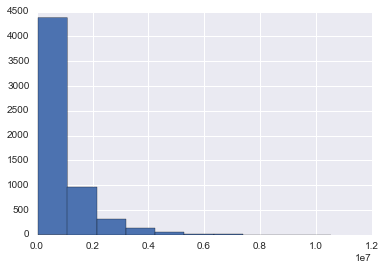

In [27]:
train.groupby("User_ID")["Purchase"].sum().hist()

In [28]:
#create a new feature representing the amount of times a user made a purchase.
train['User_Count'] = train.groupby('User_ID').User_ID.transform('count')
test['User_Count'] = test.groupby('User_ID').User_ID.transform('count')

#create a feature representing the amount of times a product was bought.
train['Product_Count'] = train.groupby('Product_ID').Product_ID.transform('count')
test['Product_Count'] = test.groupby('Product_ID').Product_ID.transform('count')

#create a feature representing the average purchase of each product. We'll have to create
#a function for the test set as it is missing the purchase column.

train['Product_Mean'] = train.groupby('Product_ID').Purchase.transform('mean')

product_mean_dict = train.set_index('Product_ID').to_dict()['Purchase']
average_product_sales = train.Product_Mean.mean()

def product_mean(row):
    if row.Product_ID in product_mean_dict.keys():
        return product_mean_dict.get(row.Product_ID)    
    if row.Product_ID not in product_mean_dict.keys():
        return average_product_sales        

test['Product_Mean'] = test.apply(lambda row: product_mean(row), axis=1)

In [29]:
#Let's see what the data looks like now. 
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,User_Count,Product_Count,Product_Mean
0,1000001,P00069042,F,14,10,A,2,0,3,8370,35,227,11870.863436
1,1000001,P00248942,F,14,10,A,2,0,1,15200,35,581,16304.030981
2,1000001,P00087842,F,14,10,A,2,0,12,1422,35,102,1237.892157
3,1000001,P00085442,F,14,10,A,2,0,12,1057,35,341,1455.140762
4,1000002,P00285442,M,60,16,C,4,0,8,7969,77,203,7692.763547


In [30]:
#Most machine learning frameworks only accept numerical data as input. Let's get the dummy
#variables we need for the data to be in a valid format.

cols = ['Gender', 'Occupation', 'City_Category', 'Marital_Status', 'Product_Category_1']

train = pd.get_dummies(train, columns=cols)
test = pd.get_dummies(test, columns=cols)

In [31]:
print(test.shape, train.shape)

(233599, 53) (550068, 56)


In [32]:
#Add missing product categories to test set.

print(train.columns.get_loc('Product_Category_1_19'))

test.insert(45, 'Product_Category_1_19', 0.0)
#test.insert(45, 'Product_Category_1_20', 0.0)

46


In [33]:
print(train.columns.get_loc('Product_Category_1_20'))

test.insert(47, 'Product_Category_1_20', 0.0)

48


In [35]:
print(test.shape, train.shape)

(233599, 55) (550068, 56)


In [37]:
#Create new csv files for the modified train and test sets.

test.to_csv('black_test_for_eda.csv', index=False)
train.to_csv('black_train_for_eda.csv', index=False)